In [4]:
cd /media/sf_Box_Sync/Hyperlactemia\ sepsis\ project_jinghe/Data/

/media/sf_Box_Sync/Hyperlactemia sepsis project_jinghe/Data


In [27]:
# analyze how often are lactates checked?
import pandas as pd


data_df2_3a = pd.read_csv('data_df2.3a.csv', header = False)
data_df2_3a = pd.DataFrame(data_df2_3a)
data_df2_3a.head()


,id,charttime,itemid,valuenum
0,1003#%#1#%#1,3235-02-14 06:48:00,50010,3.8
1,1003#%#1#%#1,3235-02-14 06:48:00,818,3.8
2,1003#%#1#%#1,3235-02-14 16:01:00,50010,5.4
3,1003#%#1#%#1,3235-02-14 16:01:00,818,5.4
4,1003#%#1#%#1,3235-02-14 22:04:00,50010,6.7


In [31]:
data_df2_3a.columns = ['id', 'charttime', 'itemid', 'valuenum']
data_df2_3a_2 = data_df2_3a.drop_duplicates(['id', 'charttime'])
data_df2_3a_2.head()

,id,charttime,itemid,valuenum
0,1003#%#1#%#1,3235-02-14 06:48:00,50010,3.8
2,1003#%#1#%#1,3235-02-14 16:01:00,50010,5.4
4,1003#%#1#%#1,3235-02-14 22:04:00,50010,6.7
6,1003#%#1#%#1,3235-02-15 00:37:00,50010,6.4
8,1003#%#1#%#1,3235-02-16 07:55:00,50010,6.7


In [81]:
data_df2_3a_2_by_id = data_df2_3a_2.groupby('id')

import datetime
import matplotlib.pyplot as plt

diff_per_pt = []
diff_per_pt_high = []
diff_per_pt_low = []
for name, group in data_df2_3a_2_by_id:
    lines=group.values.tolist()

    for i in range(len(lines)-1):
        first = datetime.datetime.strptime(lines[i][1], '%Y-%m-%d %H:%M:%S')
        first_lac = lines[i][3]
        second = datetime.datetime.strptime(lines[i+1][1], '%Y-%m-%d %H:%M:%S')
        second_lac = lines[i+1][3]
        
        diff = second - first
        diff = diff.total_seconds()/3600
        if diff > 50:
            continue
        else:  
            diff_per_pt.append(diff)

            if first_lac < 4:
                diff_per_pt_low.append(diff)
            else:
                diff_per_pt_high.append(diff)       
    

count    2315.000000
mean        6.217171
std         9.081062
min         0.016667
25%         1.000000
50%         2.100000
75%         7.000000
max        49.716667
dtype: float64

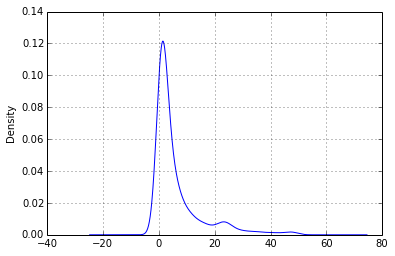

In [85]:
%matplotlib inline

diff_per_pt_pd = pd.Series(diff_per_pt)
diff_per_pt_pd.describe()

plt.figure()
diff_per_pt_pd.plot(kind='density')
plt.show()

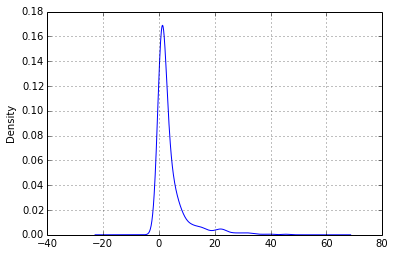

In [86]:
diff_per_pt_high_pd = pd.Series(diff_per_pt_high)
diff_per_pt_high_pd.describe()
plt.figure()
diff_per_pt_high_pd.plot(kind='density')
plt.show()

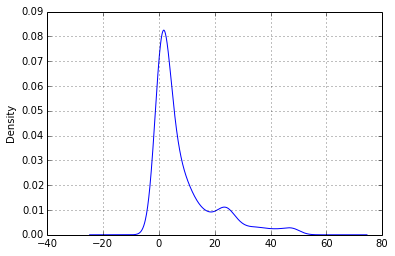

In [87]:
diff_per_pt_low_pd = pd.Series(diff_per_pt_low)
diff_per_pt_low_pd.describe()
plt.figure()
diff_per_pt_low_pd.plot(kind='density')
plt.show()

In [90]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd

def getmeasurementgaps(filename):
    data_df2_3a = pd.read_csv(filename, header = False)
    data_df2_3a = pd.DataFrame(data_df2_3a)
    data_df2_3a.head()
    data_df2_3a.columns = ['id', 'charttime', 'itemid', 'valuenum']
    data_df2_3a_2 = data_df2_3a.drop_duplicates(['id', 'charttime'])
    data_df2_3a_2.head()
    data_df2_3a_2_by_id = data_df2_3a_2.groupby('id')


    diff_per_pt = []
    diff_per_pt_high = []
    diff_per_pt_low = []
    for name, group in data_df2_3a_2_by_id:
        lines=group.values.tolist()

        for i in range(len(lines)-1):
            first = datetime.datetime.strptime(lines[i][1], '%Y-%m-%d %H:%M:%S')
            first_lac = lines[i][3]
            second = datetime.datetime.strptime(lines[i+1][1], '%Y-%m-%d %H:%M:%S')
            second_lac = lines[i+1][3]

            diff = second - first
            diff = diff.total_seconds()/3600
            if diff > 50:
                continue
            else:  
                diff_per_pt.append(diff)

                if first_lac < 4:
                    diff_per_pt_low.append(diff)
                else:
                    diff_per_pt_high.append(diff)    
    return [diff_per_pt, diff_per_pt_high, diff_per_pt_low]                    

In [93]:
def plots(diff_per_pt, diff_per_pt_high, diff_per_pt_low):
    %matplotlib inline

    diff_per_pt_pd = pd.Series(diff_per_pt)
    diff_per_pt_pd.describe()

    plt.figure()
    diff_per_pt_pd.plot(kind='density', title = 'how often are lactates measured? - all')
    plt.show()

    diff_per_pt_high_pd = pd.Series(diff_per_pt_high)
    diff_per_pt_high_pd.describe()
    plt.figure()
    diff_per_pt_high_pd.plot(kind='density', title = 'how often are lactates measured? - high lactate')
    plt.show()

    diff_per_pt_low_pd = pd.Series(diff_per_pt_low)
    diff_per_pt_low_pd.describe()
    plt.figure()
    diff_per_pt_low_pd.plot(kind='density', title = 'how often are lactates measured? - low lactate')
    plt.show()
    return [diff_per_pt_pd, diff_per_pt_high_pd, diff_per_pt_low_pd]

In [99]:
def lactate_freq_analysis(filename):
    diff_per_pt_all = getmeasurementgaps(filename)
    diff_per_pt_all_pd = plots(diff_per_pt_all[0], diff_per_pt_all[1], diff_per_pt_all[2])
    print 'how often are lactates measured? - all:'
    print diff_per_pt_all_pd[0].describe()

    print 'how often are lactates measured? - high lactate:'
    print diff_per_pt_all_pd[0].describe()

    print 'how often are lactates measured? - low lactate:'
    print diff_per_pt_all_pd[0].describe()

patients had antibiotics before lactate clearance:


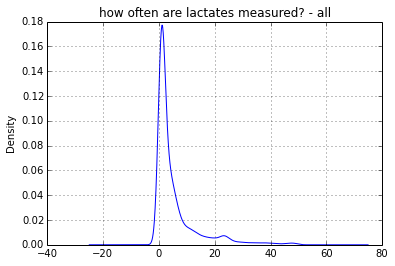

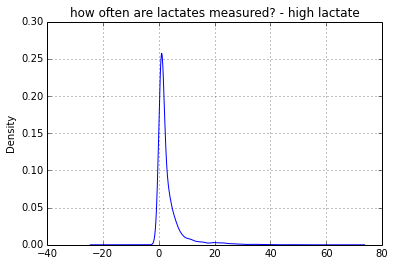

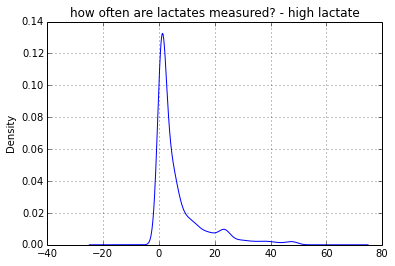

how often are lactates measured? - all:
count    14544.000000
mean         5.511476
std          8.236467
min          0.016667
25%          1.000000
50%          1.883333
75%          6.000000
max         49.983333
dtype: float64
how often are lactates measured? - high lactate:
count    14544.000000
mean         5.511476
std          8.236467
min          0.016667
25%          1.000000
50%          1.883333
75%          6.000000
max         49.983333
dtype: float64
how often are lactates measured? - low lactate:
count    14544.000000
mean         5.511476
std          8.236467
min          0.016667
25%          1.000000
50%          1.883333
75%          6.000000
max         49.983333
dtype: float64
patients had antibiotics after lactate clearance:


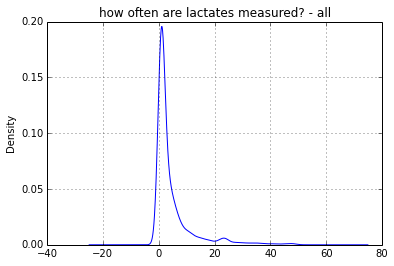

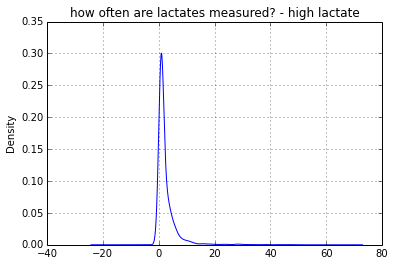

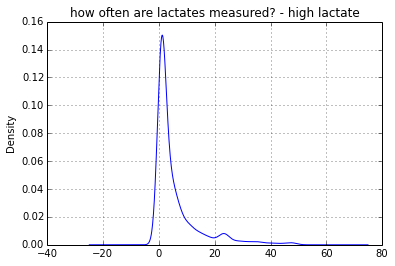

how often are lactates measured? - all:
count    9470.000000
mean        4.673177
std         7.549025
min         0.016667
25%         1.000000
50%         1.100000
75%         4.929167
max        49.966667
dtype: float64
how often are lactates measured? - high lactate:
count    9470.000000
mean        4.673177
std         7.549025
min         0.016667
25%         1.000000
50%         1.100000
75%         4.929167
max        49.966667
dtype: float64
how often are lactates measured? - low lactate:
count    9470.000000
mean        4.673177
std         7.549025
min         0.016667
25%         1.000000
50%         1.100000
75%         4.929167
max        49.966667
dtype: float64
patients without antibiotics:


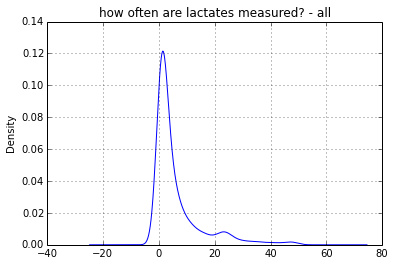

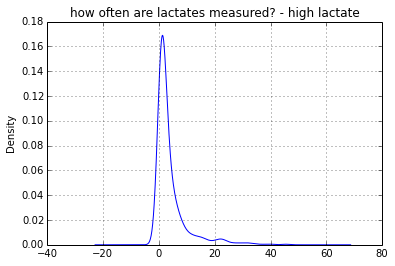

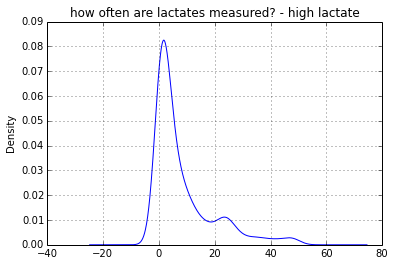

how often are lactates measured? - all:
count    2315.000000
mean        6.217171
std         9.081062
min         0.016667
25%         1.000000
50%         2.100000
75%         7.000000
max        49.716667
dtype: float64
how often are lactates measured? - high lactate:
count    2315.000000
mean        6.217171
std         9.081062
min         0.016667
25%         1.000000
50%         2.100000
75%         7.000000
max        49.716667
dtype: float64
how often are lactates measured? - low lactate:
count    2315.000000
mean        6.217171
std         9.081062
min         0.016667
25%         1.000000
50%         2.100000
75%         7.000000
max        49.716667
dtype: float64


In [101]:
print 'patients had antibiotics before lactate clearance:'
filename1 = 'data_df2.3b.csv'
lactate_freq_analysis(filename1)

print 'patients had antibiotics after lactate clearance:'
filename2 = 'data_df2.3c.csv'
lactate_freq_analysis(filename2)

print "patients without antibiotics:"
filename3 = 'data_df2.3a.csv'
lactate_freq_analysis(filename3)